<a href="https://colab.research.google.com/github/Arvaloplz/Arvaloplz.github.io/blob/master/TALLER_3_M%C3%93DULO_3-Grupo_Andrade_Moyano_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendamos a usar Keras
Keras es una librería para python que nos permite crear redes neuronales de manera rápida y eficiente. De esta manera nos evitamos las implementaciones de componentes más complejos y nos podemos concentrar en encontrar los parámetros apropiados para nuestra tarea de predicción. 

Esta vez haremos una tarea de clasificación, específicamente del [dataset de flores Iris para clasificación de flores](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) a partir de las medidas del sepalo y sus pétalos.

<p align=center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg" height="200">
</p>

Primero se deben importar las librerías necesarias. Utilizaremos Keras para la creación de la red neuronal, Pandas para leer nuestro csv con los datos de enrtenamiento y algunas funciones de sklearn para procesar estos datos.

In [35]:
import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler # ? 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

Con pd.read_csv() podemos leer un csv a partir de un archivo local o una url.

In [39]:
data = datasets.load_breast_cancer()
df = pd.DataFrame( data.data , columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Como podemos ver, nuestro dataset contiene 4 características respectivas a las flores y 1 clase (como string) del tipo de flor al que pertenece. Debemos separar esto para poder hacer uso de nuestros algoritmos.

Además, es importante para el correcto rendimiento de la red, que cada característica esté normalizada y que las clases estén en formato numérico. 

In [42]:
df['target'] = data.target
Y = pd.get_dummies(df['target']) #   separo etiquetas
X = df.drop(columns=['target']) #    de los datos 
X = (X-X.mean())/X.std() #            y normalizo


Finalmente, hay que dividir los datos en Train y Test. Durante el entrenamiento, la red sólo verá los primeros datos, esto es para asegurarse que no esté memorizando solamente. Usualmente la proporción para dividir estos datos es 70/30, siendo mayor la cantidad de datos para entrenamiento.

In [43]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)


Con los datos ya procesados y divididos en set de entrenamiento y test, ya podemos crear la red. Gracias a keras, este proceso es muy simple!

In [51]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(10, input_dim=30, activation="relu"))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(2, activation="softmax"))

modelo.compile(loss='mse', optimizer='adam')


El código anterior definió una red neuronal, con una capa de entrada de 4 neuronas, 3 capas ocultas de 8 neuronas cada una y una capa de salida con 3 neuronas correspondientes a las clases. La última capa realiza una función de activación *softmax*, que permite transformar las salidas de las neuronas en una probabilidad, de modo que la neurona con el valor más alto será la seleccionada.

Finalmente, el modelo se optimizará con una función de pérdida del error cuadrático medio y con un optimizador *adam*, por 150 epocas.

In [52]:
history = modelo.fit(X_train, Y_train, epochs=150, batch_size=10, validation_split=0.1)

Epoch 1/150
36/36 [==============================] - 1s 8ms/step - loss: 0.2254 - val_loss: 0.1811
Epoch 2/150
36/36 [==============================] - 0s 4ms/step - loss: 0.1551 - val_loss: 0.1191
Epoch 3/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0956 - val_loss: 0.0694
Epoch 4/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.0467
Epoch 5/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.0392
Epoch 6/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.0354
Epoch 7/150
36/36 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0340
Epoch 8/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.0323
Epoch 9/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.0320
Epoch 10/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0305
Epoch 11/

Podemos ver como efectivamente, durante el entrenamiento, la función de coste nos indicó que el modelo va mejorando en sus predicciones.

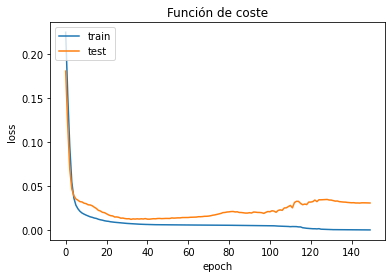

In [53]:
plt.plot(history.history['loss']) # corresponden al test
plt.plot(history.history['val_loss'])# corresponden al train
plt.title('Función de coste')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ahora, finalmente podemos realizar métricas de rendimiento del modelo cuando este predice los datos de Test. Para la tarea de clasificación, podemos utilizar la presición, recall o el f1-score. Todas estas métricas se basan en los errores tipo 1 (Falso positivo) y tipo 2(Falso negativo).

<p align="center">
<img src="https://www.researchgate.net/profile/Sebastian-Bittrich/publication/330174519/figure/fig1/AS:711883078258689@1546737560677/Confusion-matrix-Exemplified-CM-with-the-formulas-of-precision-PR-recall-RE.png" height="220">
</p>

In [58]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = modelo.predict(X_test)
Y_exp = Y_test.to_numpy()
for i in range(len(Y_pred)):
  Y_pred[i] = np.array([1 if Y_pred[i][j] == np.max(Y_pred[i]) else 0 for j in range(len(Y_pred[i]))])
  

print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

matriz_confusion = multilabel_confusion_matrix(Y_exp, Y_pred)
print(matriz_confusion)

0.9532163742690059
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.96      0.96      0.96       104

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171
 samples avg       0.95      0.95      0.95       171

[[[100   4]
  [  4  63]]

 [[ 63   4]
  [  4 100]]]


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = ['no se detecta', 'se detecta']

for i, matrix in enumerate(matriz_confusion):
  labels = [f'True Neg\n{matrix[0][0]}',f'False Pos\n{matrix[0][1]}',f'False Neg\n{matrix[1][0]}',f'True Pos\n{matrix[1][1]}']

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(matriz_confusion[2], annot=labels, fmt='', cmap='rocket_r')

  ax.set_title(f'Matriz de Confusión para {clases[i]}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

IndexError: ignored

Ahora prueben cambiando la arquitectura de la red o el dataset y su procesamiento.